<a href="https://colab.research.google.com/github/anshupandey/Working_with_Large_Language_models/blob/main/WWL_C15_Image_Generation_with_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to GAN

##### Analogy to GAN

Let's take a theoretical example of the process of **money counterfeiting**. In this process, we can imagine two types agents: **a criminal and cop**. Let us look into their competing objectives:

* **Criminal's Objective**: The main objective of the criminal is to come up with complex ways of counterfeiting money such that the Cop cannot distinguish between counterfeited money and real money.
* **Cop's Objective**: The main objective of the cop is to come up with complex ways so as to distinguish between counterfeited money and real money.

As this process progresses the cop develops more and more sophisticated technology to detect money counterfeiting and criminal develops more and more sophisticated technology to counterfeit money. This is the basis of what is called an **Adversarial Process**.

Generative Adversarial Networks take advantage of Adversarial Processes to train two Neural Networks who compete with each other until a desirable equilibrium is reached.



###  Discriminative algorithms


Classification algorithms that constructs decision boundaries that separates classes are called **Discriminative models**. Discriminative algorithms try to classify input data; that is, given the features of a data instance, they predict a label or category to which that data belongs.


Discriminative algorithms **map features to labels**.



### Generative algorithms

Generative algorithms performs the functionality of attempting to **predict features given a certain label**. They aim at learning the true data distribution of the training set so as to generate new data points with some variations.


### Generative Adversarial Networks

GAN’S are generative models that will learn the distribution of data to generate new points. GANs were first invented by Ian Goodfellow in 2014.

Imagine a random image(sampled from gaussian distribution) sent through a neural network.The output of the network is also of same size(image).Now if we could tell the network to tweak it’s parameters until the output image is close to our reference image but different,we get a generative model.


This is based on game theory and has two players or networks: a generator network and b) a discriminator network, both competing against each other. This dual network game theory-based approach vastly improved the process of learning from unlabeled data.

The **generator network produces fake data** and passes it to a discriminator. The discriminator network also sees real data and predicts whether the data it receives is fake or real. So, the generator is trained so that it can easily produce data that is very close to real data in order to fool the discriminator network.
The discriminator network is trained to classify which data is real and which data is fake. **So, eventually, a generator network learns to produce data that is very, very close to real data.**

## Deep Convolutional Generative Adversarial Networks


Convolutional networks (CNNs) has seen huge adoption in computer vision applications. Comparatively, unsupervised learning with CNNs has received less attention.  **Deep convolutional generative adversarial networks (DCGANs)**, demonstrate how unsupervised learning can be performed using CNNs.


### What is DCGAN?

A DCGAN is a direct extension of the GAN, except that it explicitly uses convolutional and convolutional-transpose layers in the discriminator and generator, respectively.

* The discriminator is made up of strided convolution layers, batch norm layers, and LeakyReLU activations. The input is a 3x64x64 input image and the output is a scalar probability that the input is from the real data distribution.

* The generator is comprised of convolutional-transpose layers, batch norm layers, and ReLU activations. The input is a latent vector, z, that is drawn from a standard normal distribution and the output is a 3x64x64 RGB image. The strided conv-transpose layers allows the latent vector to be transformed into a volume with the same shape as an image.

Deep Convolutional Generative Adversarial Networks works in the opposite direction of the image classifier (CNN).
* CNN transforms an image to a class label (list of probabilities).
* DCGAN generates an image from random parameters.



The core to the DCGAN architecture uses a standard CNN architecture on the discriminative model.




### 4.3 Hands-on with Deep Convolutional Generative Adversarial networks

In [1]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
import matplotlib.pyplot as plt

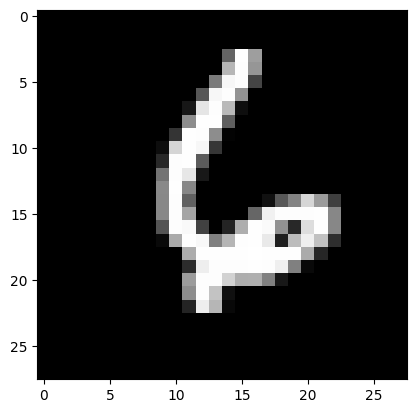

In [19]:
img = xtrain[59000].reshape(28,28)
plt.imshow(img,cmap='gray')
plt.show()

In [20]:
28*28

784

# Modelling GANs

In [21]:
from tensorflow.keras import models,layers

In [22]:
# Generator
# generator will accept x arrays of size 100 where x = batchsize
gen_input = layers.Input(shape=100)
x = layers.Dense(128*7*7,activation="tanh")(gen_input)
x = layers.BatchNormalization()(x)
x = layers.Reshape((7,7,128))(x)
x = layers.UpSampling2D()(x)
x = layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='tanh')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D()(x)
gen_output = layers.Conv2D(filters=1,kernel_size=(5,5),padding='same',activation='tanh')(x)

gen_model = models.Model(inputs=gen_input,outputs=gen_output)
gen_model.compile(loss="binary_crossentropy",optimizer='adam')
gen_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 6272)              633472    
                                                                 
 batch_normalization (Batch  (None, 6272)              25088     
 Normalization)                                                  
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        204864

In [23]:
# Discriminator
dis_input = layers.Input(shape=(28,28,1))
x = layers.Conv2D(filters=64,kernel_size=(5,5),padding='same',strides=(2,2),activation='relu')(dis_input)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(filters=128,kernel_size=(5,5),padding='same',strides=(2,2),activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
dis_output = layers.Dense(1,activation='sigmoid')(x)

dis_model = models.Model(inputs=dis_input,outputs=dis_output)
dis_model.compile(loss="binary_crossentropy",optimizer='adam')
dis_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6273

In [24]:
# creating GAN model using both generator and discriminators
# create input for GAN
dis_model.trainable = False
gan_input = layers.Input(shape=(100,))
x = gen_model(gan_input)
gan_output = dis_model(x)
gan = models.Model(inputs=gan_input,outputs=gan_output)
gan.compile(loss="binary_crossentropy",optimizer='adam')
gan.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 model (Functional)          (None, 28, 28, 1)         865281    
                                                                 
 model_1 (Functional)        (None, 1)                 212865    
                                                                 
Total params: 1078146 (4.11 MB)
Trainable params: 852609 (3.25 MB)
Non-trainable params: 225537 (881.00 KB)
_________________________________________________________________


In [25]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
xtrain = xtrain.astype('float32')
# scale the images
xtrain = (xtrain - 127.5) / 127.5


In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# training the model
epochs = 10
batch_size=200
batch_count = xtrain.shape[0]//batch_size

for i in range(epochs):
  loss= []
  for j in range(batch_count):
    # random input for generator
    noise_input = np.random.rand(batch_size,100)
    # preparing input training for discriminator
    gen_prediction = gen_model.predict(noise_input,batch_size=batch_size)
    real_images = xtrain[np.random.randint(0,xtrain.shape[0],batch_size)]
    X_dis = np.concatenate([gen_prediction,real_images])
    Y_dis = np.array([0]*batch_size + [1]*batch_size).reshape(-1,1)

    ######################################################
    ##### Train the model ##################
    dis_model.trainable = True
    dis_model.train_on_batch(X_dis,Y_dis)

    ##### Train the generator #####
    noise_input = np.random.rand(batch_size,100)
    y_generator = np.array([[1]*batch_size]).reshape(-1,1)
    dis_model.trainable = False
    model_loss = gan.train_on_batch(noise_input,y_generator)
    loss.append(model_loss)
  print("Epoch ",i," completed")
  print("Loss of GAN is ",sum(loss)/len(loss))


1/1 [==============================] - 0s 30ms/step
Epoch  0  completed
Loss of GAN is  1.485842329065005
1/1 [==============================] - 0s 18ms/step
Epoch  1  completed
Loss of GAN is  1.4971373315652212
1/1 [==============================] - 0s 15ms/step
Epoch  2  completed
Loss of GAN is  1.6473037048180899
1/1 [==============================] - 0s 26ms/step
Epoch  3  completed
Loss of GAN is  1.7462864549954733
1/1 [==============================] - 0s 34ms/step
Epoch  4  completed
Loss of GAN is  1.79454093058904
1/1 [==============================] - 0s 16ms/step
Epoch  5  completed
Loss of GAN is  1.8673530157407126
1/1 [==============================] - 0s 15ms/step
Epoch  6  completed
Loss of GAN is  2.0350725607077282
1/1 [==============================] - 0s 16ms/step
Epoch  7  completed
Loss of GAN is  2.011925641298294
1/1 [==============================] - 0s 25ms/step
Epoch  8  completed
Loss of GAN is  1.959325703382492
1/1 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step
(50, 28, 28, 1)


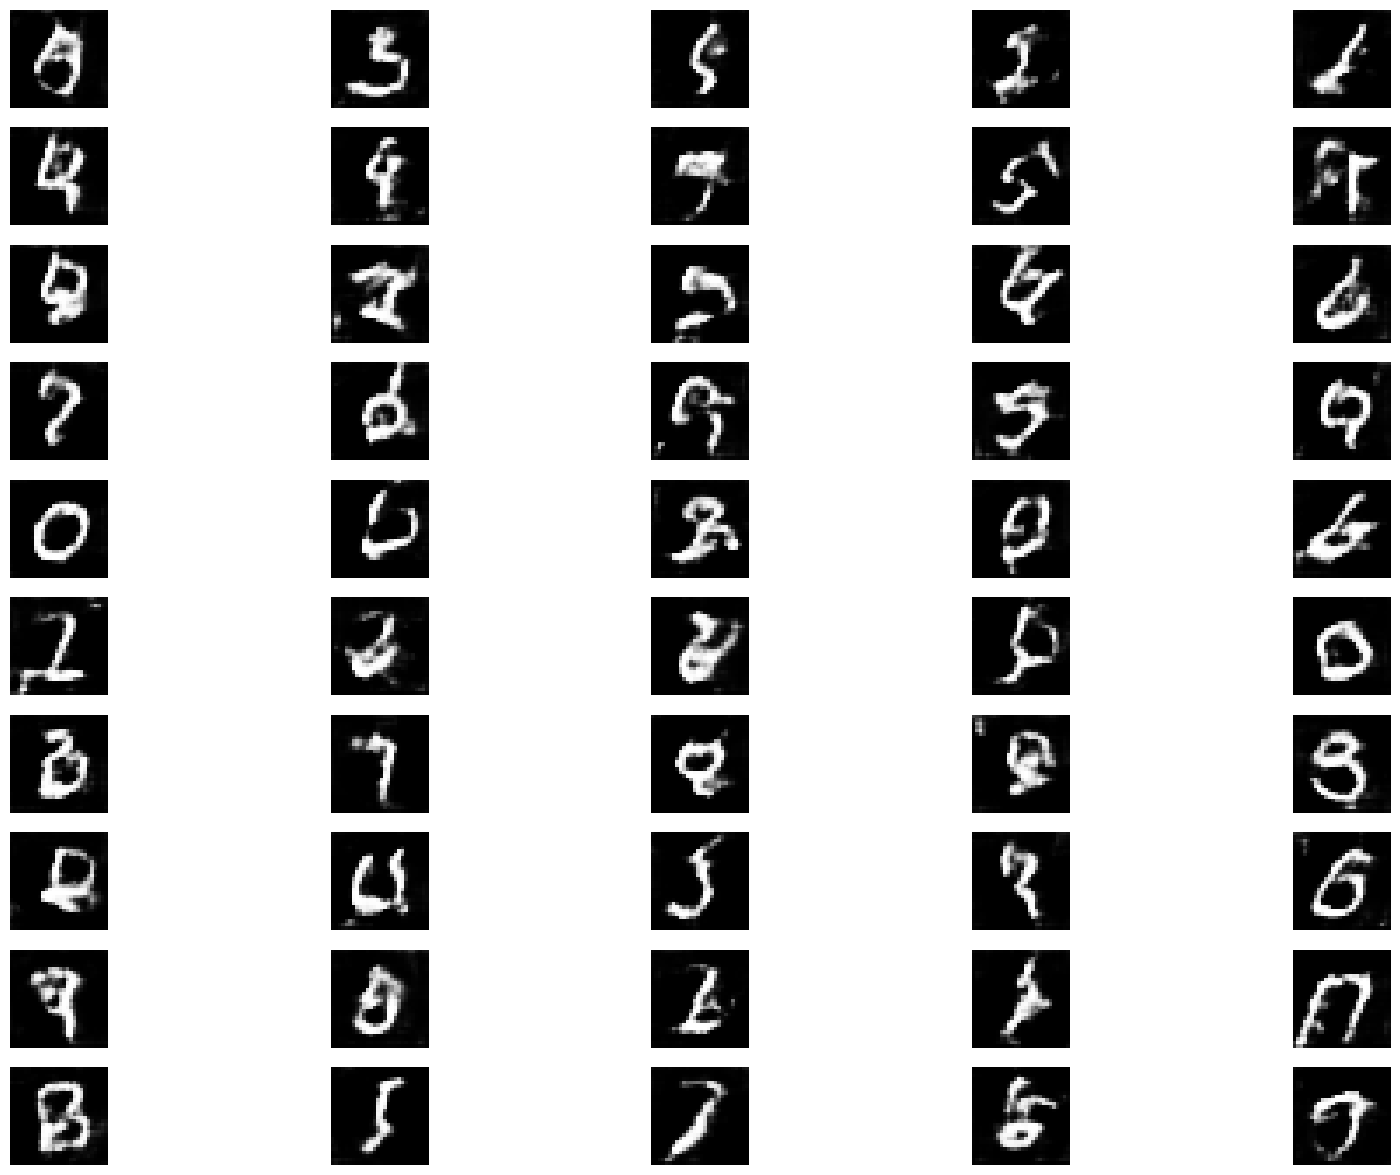

In [30]:
noise_input = np.random.rand(50,100)
prediction = gen_model.predict(noise_input)
print(prediction.shape)
plt.figure(figsize=(20,15))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.imshow(prediction[i,:,:,0],cmap='gray')
  plt.axis('off')
plt.show()

2/2 [==============================] - 0s 5ms/step
(50, 28, 28, 1)


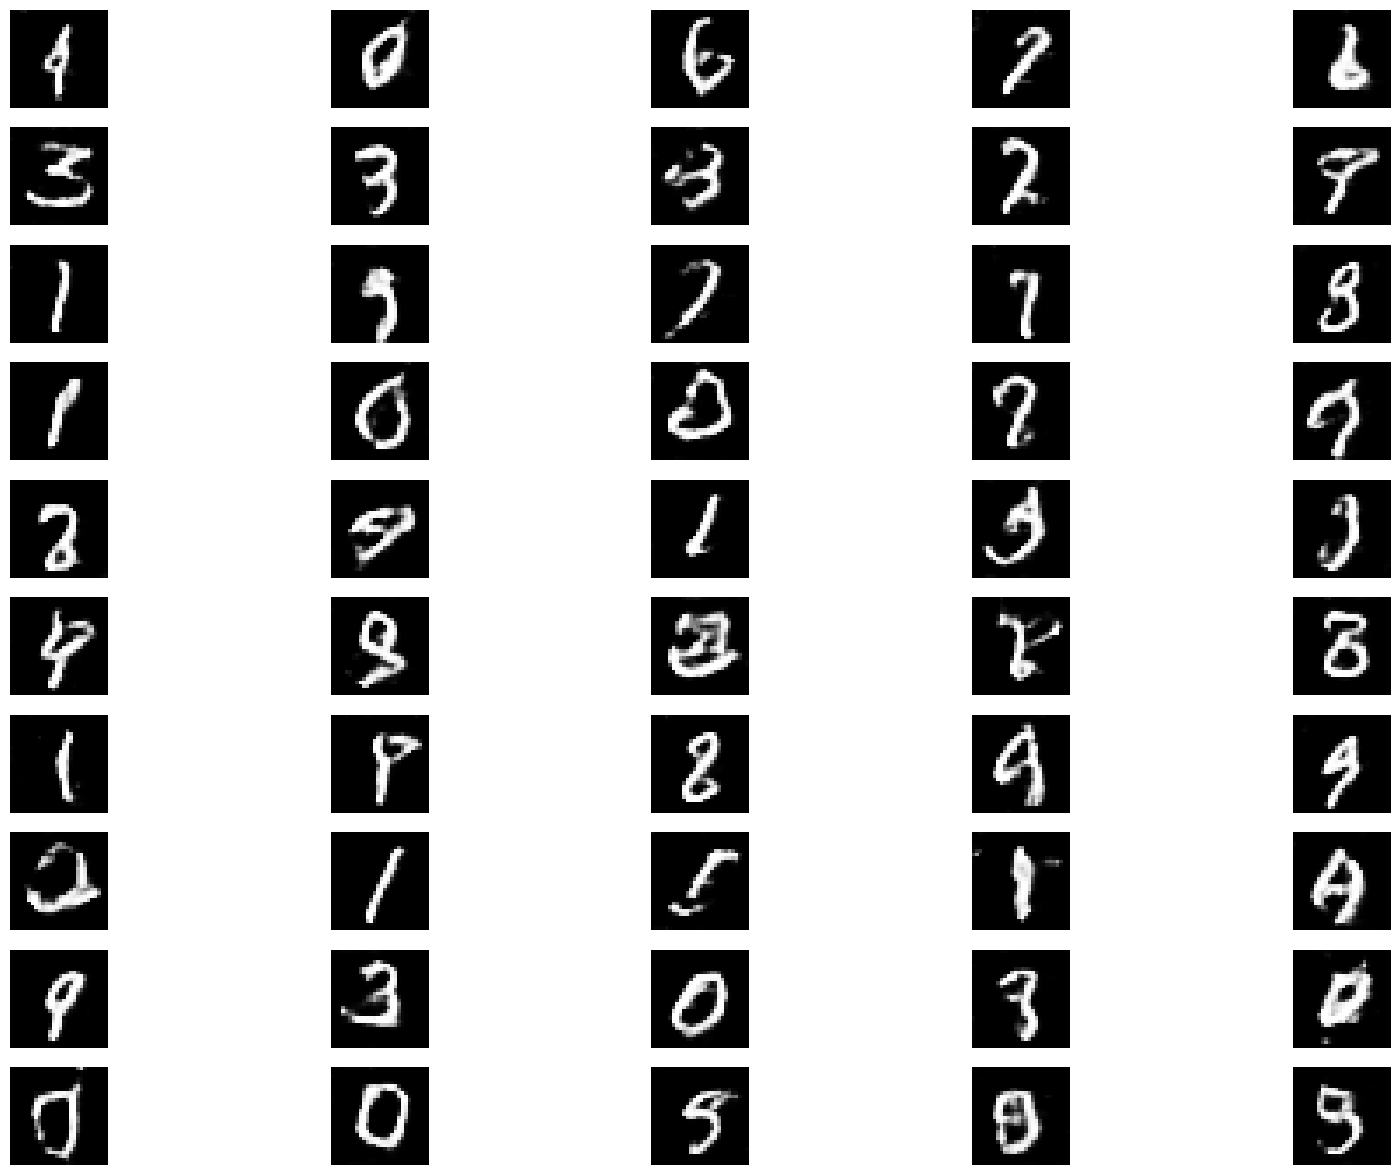

In [32]:
noise_input = np.random.rand(50,100)
prediction = gen_model.predict(noise_input)
print(prediction.shape)
plt.figure(figsize=(20,15))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.imshow(prediction[i,:,:,0],cmap='gray')
  plt.axis('off')
plt.show()